In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import  scipy as sc
%matplotlib inline

from matplotlib.animation import FuncAnimation
from matplotlib import rc
rc('animation', html='jshtml')

# Q1

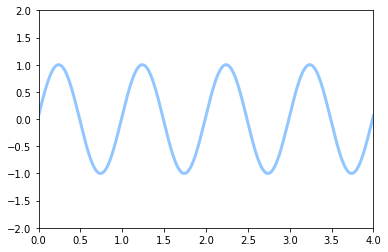

In [ ]:
plt.style.use('seaborn-pastel')

fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)
anim

# Q2

In [53]:
pip install geopandas


     |████████████████████████████████| 972kB 2.6MB/s 
     |████████████████████████████████| 10.9MB 32.8MB/s 
     |████████████████████████████████| 14.8MB 251kB/s 


In [54]:
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon

In [55]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

In [56]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

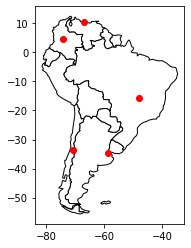

In [57]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')
gdf.plot(ax=ax, color='red')
plt.show()


# **Q3**

In [58]:
a=pd.read_csv('/content/drive/My Drive/dataset/day.csv')

In [59]:
a.head()

instant      dteday  season  yr  ...  windspeed  casual  registered   cnt
0        1  2011-01-01       1   0  ...   0.160446     331         654   985
1        2  2011-01-02       1   0  ...   0.248539     131         670   801
2        3  2011-01-03       1   0  ...   0.248309     120        1229  1349
3        4  2011-01-04       1   0  ...   0.160296     108        1454  1562
4        5  2011-01-05       1   0  ...   0.186900      82        1518  1600

[5 rows x 16 columns]

In [60]:
def change(a):
    seas={1:'Spring',2:'Summer',3:'Fall/Autumn',4:'Winter'}
    return seas[a]
a['season']=a['season'].apply(change)

In [61]:
a['season'].value_counts()

Fall/Autumn    188
Summer         184
Spring         181
Winter         178
Name: season, dtype: int64

In [62]:
def year(a):
    y={0:2011,1:2012}
    return y[a]
a['yr']=a['yr'].apply(year)

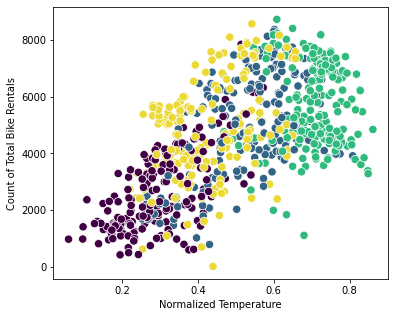

In [63]:
plt.figure(figsize=(6,5))
x=[0.2,0.4,0.6,0.8]
y=[0,2000,4000,6000,8000]
sns.scatterplot(x=a['temp'],y=a['cnt'],hue=a['season'],marker='o',s=70,palette=['#420044','#336485','#2ebb7d','#ebd935'])
plt.xticks(x)
plt.yticks(y)
plt.xlabel('Normalized Temperature')
plt.ylabel('Count of Total Bike Rentals')
plt.legend('',frameon=False);

#Q4

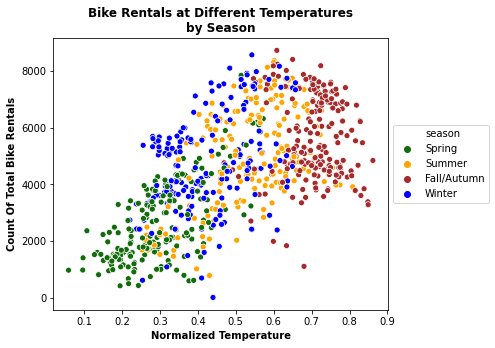

In [64]:
plt.figure(figsize=(6,5))

y=[0,2000,4000,6000,8000]
sns.scatterplot(x=a['temp'],y=a['cnt'],hue=a['season'],palette={'Spring':'#146B0B','Summer':'orange','Fall/Autumn':'brown','Winter':'blue'})
plt.title('Bike Rentals at Different Temperatures' + '\n' +'by Season',fontweight='bold')
plt.yticks(y)
plt.xlabel('Normalized Temperature',fontweight='bold')
plt.ylabel('Count Of Total Bike Rentals',fontweight='bold')
plt.legend(bbox_to_anchor=(1,0.7));

# Q5

''

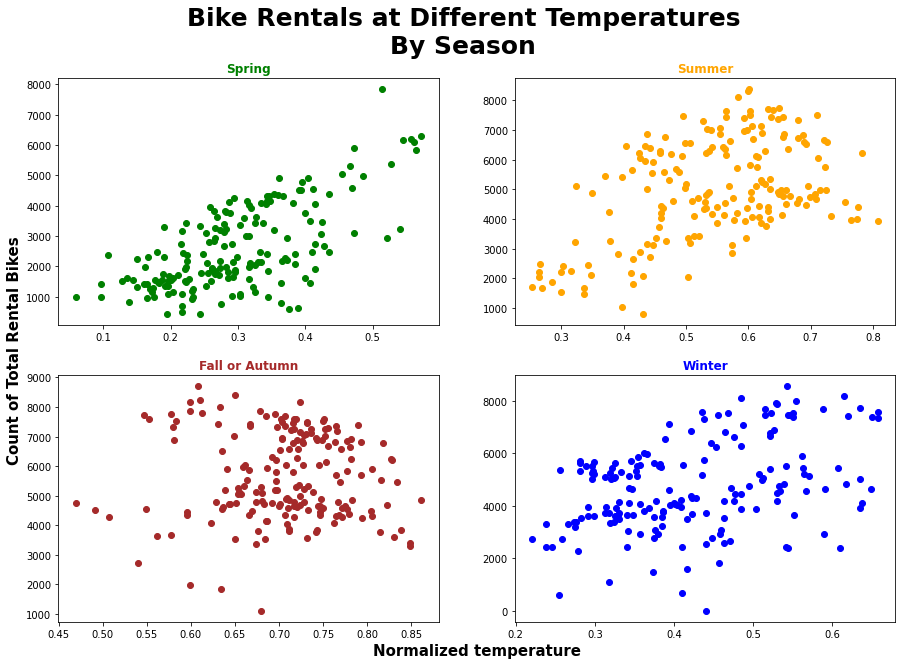

In [65]:

fig1,ax1=plt.subplots(nrows=2,ncols=2,figsize=(15,10))
fig1.suptitle('Bike Rentals at Different Temperatures\nBy Season', fontsize=25,fontweight="bold")

ax1[0,0].scatter('temp','cnt',data=a[a['season']=='Spring'],c='green')

ax1[0,0].set_title('Spring', color="green",fontweight="bold")
ax1[0,0].set_ylabel("Count of Total Rental Bikes",fontsize=15,fontweight="bold", position=(0,-0.1))


ax1[0,1].scatter('temp', 'cnt', data=a[a['season']=='Summer'], c="orange")
ax1[0,1].set_title('Summer', color="orange",fontweight="bold")


ax1[1,0].scatter('temp', 'cnt', data=a[a['season']=='Fall/Autumn'], c="brown")
ax1[1,0].set_title('Fall or Autumn', color="brown",fontweight="bold")


ax1[1,1].scatter('temp', 'cnt', data=a[a['season']=='Winter'], c="blue")
ax1[1,1].set_title("Winter", color="blue",fontweight="bold")
ax1[1,1].set_xlabel("Normalized temperature",fontsize=15,fontweight="bold", position=(-0.1,0));
;



#Q6

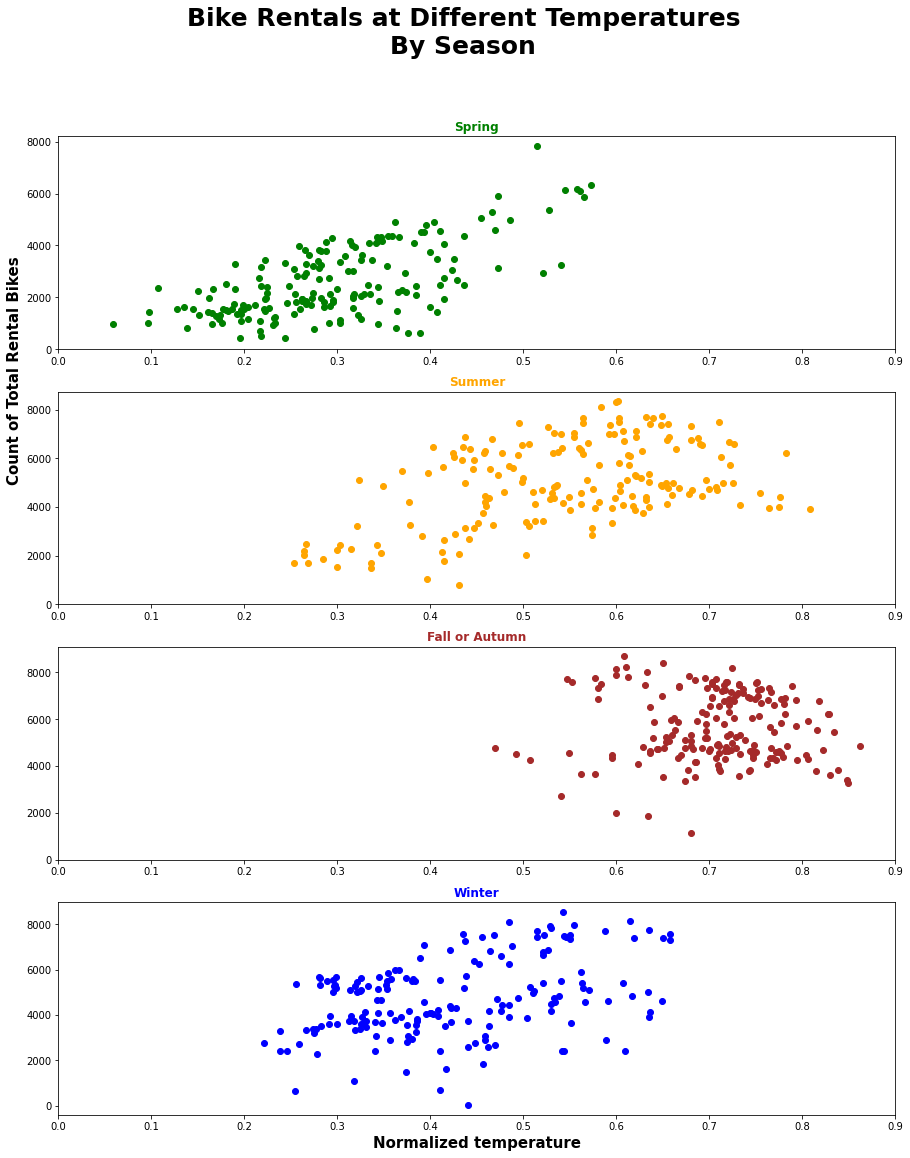

In [66]:
x=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
y=[0,2000,4000,6000,8000]
fig1,ax1=plt.subplots(nrows=4,ncols=1,figsize=(15,18))
fig1.suptitle('Bike Rentals at Different Temperatures\nBy Season', fontsize=25,fontweight="bold")
ax1[0].scatter('temp','cnt',data=a[a['season']=='Spring'],c='green')

ax1[0].set_title('Spring', color="green",fontweight="bold")
ax1[0].set_ylabel("Count of Total Rental Bikes",fontsize=15,fontweight="bold", position=(0,-0.1))
ax1[0].set_xticks(x)
ax1[0].set_yticks(y)


ax1[1].scatter('temp', 'cnt', data=a[a['season']=='Summer'], c="orange")
ax1[1].set_title('Summer', color="orange",fontweight="bold")
ax1[1].set_xticks(x)
ax1[1].set_yticks(y)

ax1[2].scatter('temp', 'cnt', data=a[a['season']=='Fall/Autumn'], c="brown")
ax1[2].set_title('Fall or Autumn', color="brown",fontweight="bold")
ax1[2].set_xticks(x)
ax1[2].set_yticks(y)

ax1[3].scatter('temp', 'cnt', data=a[a['season']=='Winter'], c="blue")
ax1[3].set_title("Winter", color="blue",fontweight="bold")
ax1[3].set_xlabel("Normalized temperature",fontsize=15,fontweight="bold", position=(0.5,0))
ax1[3].set_xticks(x)
ax1[3].set_yticks(y);



# Q7

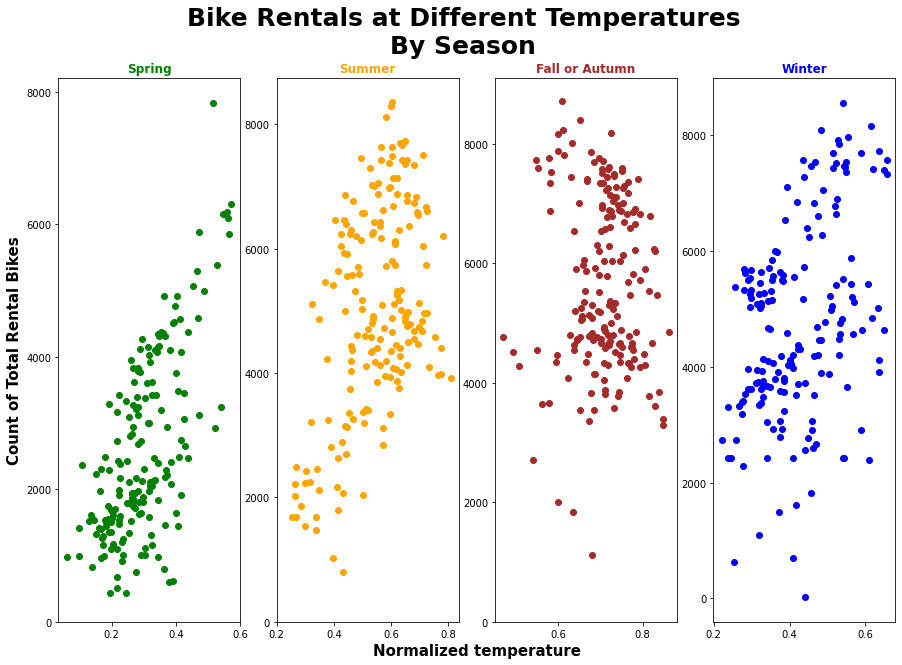

In [67]:
y=[0,2000,4000,6000,8000]
x1=[0.2,0.4,0.6]
x2=[0.2,0.4,0.6,0.8]
x3=[0.6,0.8]
fig1,ax1=plt.subplots(nrows=1,ncols=4,figsize=(15,10))
fig1.suptitle('Bike Rentals at Different Temperatures\nBy Season', fontsize=25,fontweight="bold")
ax1[0].scatter('temp','cnt',data=a[a['season']=='Spring'],c='green')

ax1[0].set_title('Spring', color="green",fontweight="bold")
ax1[0].set_ylabel("Count of Total Rental Bikes",fontsize=15,fontweight="bold", position=(0,0.5))
ax1[0].set_xticks(x1)
ax1[0].set_yticks(y)

ax1[1].scatter('temp', 'cnt', data=a[a['season']=='Summer'], c="orange")
ax1[1].set_title('Summer', color="orange",fontweight="bold")
ax1[1].set_xticks(x2)
ax1[1].set_yticks(y)

ax1[2].scatter('temp', 'cnt', data=a[a['season']=='Fall/Autumn'], c="brown")
ax1[2].set_title('Fall or Autumn', color="brown",fontweight="bold")
ax1[2].set_xticks(x3)
ax1[2].set_yticks(y)

ax1[3].scatter('temp', 'cnt', data=a[a['season']=='Winter'], c="blue")
ax1[3].set_title("Winter", color="blue",fontweight="bold")
ax1[3].set_xticks(x1)
ax1[2].set_xlabel("Normalized temperature",fontsize=15,fontweight="bold",position=(-0.1,0))
ax1[3].set_yticks(y);



# Q8

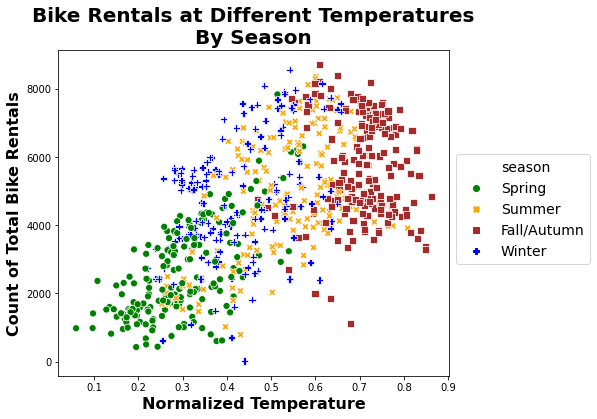

In [68]:
plt.figure(figsize=(7,6))

sns.scatterplot(x='temp', y='cnt', hue='season', data=a,palette=['green','orange','brown','blue'],style='season',s=50)
plt.xlabel('Normalized Temperature', fontsize=16, fontweight='bold')
plt.ylabel('Count of Total Bike Rentals', fontsize=16, fontweight='bold')
plt.title('Bike Rentals at Different Temperatures\nBy Season',color="black",fontweight='bold',fontsize=20,position=(0.5,1));
plt.legend(bbox_to_anchor=(1, 0.7),fontsize=14);


# Q9

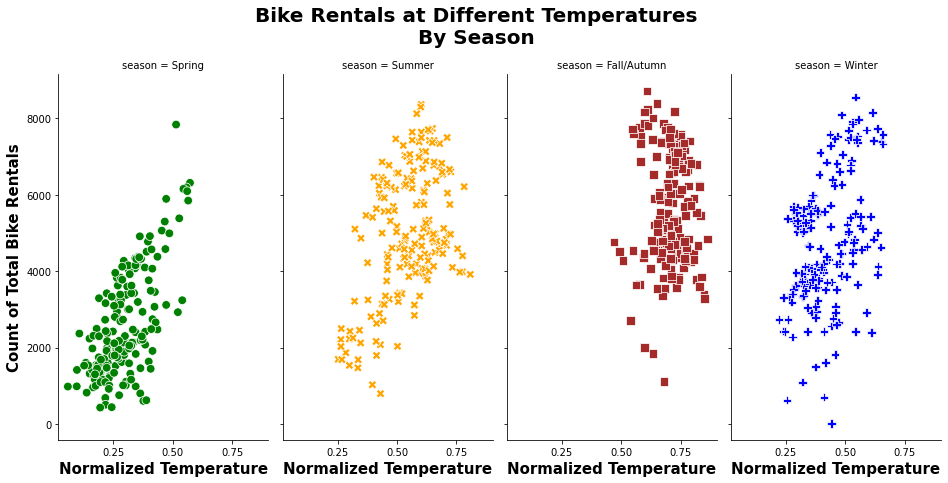

In [69]:
x=[0.25,0.50,0.75]
c=sns.relplot(x='temp', y='cnt', hue='season', data=a,palette=['green','orange','brown','blue'],col='season', col_wrap=4, legend=False
                ,height=6,aspect=.55,style='season', sizes=(800,1000),s=75)
c.fig.suptitle('Bike Rentals at Different Temperatures\nBy Season' ,position=(0.5,1.1), fontweight='bold', size=20)
c.set_xlabels("Normalized Temperature",fontweight='bold', size=15)
c.set_ylabels("Count of Total Bike Rentals",fontweight='bold', size=15)
c.set(xticks=x);

# Q10

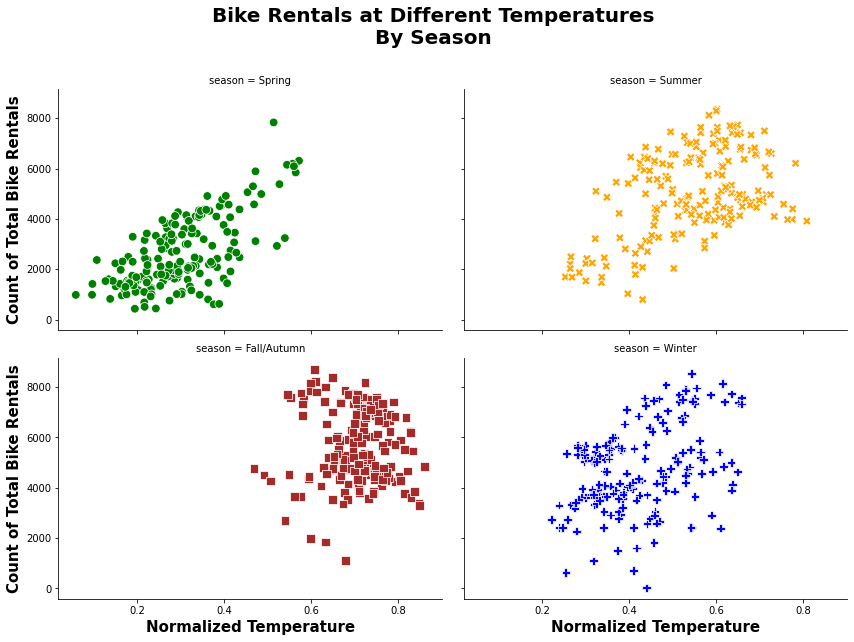

In [70]:
x=[0.2,0.4,0.6,0.8]
c=sns.relplot(x='temp', y='cnt', hue='season', data=a,palette=['green','orange','brown','blue'],col='season', col_wrap=2, legend=False
                ,height=4,aspect=1.5,style='season', sizes=(800,1000),s=75)
c.fig.suptitle('Bike Rentals at Different Temperatures\nBy Season' ,position=(0.5,1.1), fontweight='bold', size=20)
c.set_xlabels("Normalized Temperature",fontweight='bold', size=15)
c.set_ylabels("Count of Total Bike Rentals",fontweight='bold', size=15)
c.set(xticks=x);